In [1]:
import os
import tweepy as tw
import pandas as pd
from textblob import TextBlob
import re
import nltk
from nltk.tokenize import TweetTokenizer
import numpy as np
from nltk.corpus import stopwords
import string
from nltk import FreqDist
import seaborn as sns

import warnings

In [2]:
df=pd.read_csv('C:/Users/anshi/Desktop/143P/D2search_results_Debate.csv')
df

,user_country,source,content,date
0,NYC,Twitter for iPad,I’m watching the debate tonight not to learn a...,2020-10-22T23:59:59+00:00
1,NaN,Twitter for Android,@RyanSticky Wish for proper debate. Then provi...,2020-10-22T23:59:59+00:00
2,Central New York,Twitter Web App,@GOP @realDonaldTrump It's all hands on deck -...,2020-10-22T23:59:58+00:00
3,NaN,Twitter Web App,@fdlreporter And the debate committee cancels ...,2020-10-22T23:59:58+00:00
4,Springfield,Twitter for iPhone,If you’re not joining us on @4DeepMedia DISCOR...,2020-10-22T23:59:58+00:00
...,...,...,...,...
1995,NaN,Twitter Web App,@RyanAFournier It should be fine. The host wil...,2020-10-22T23:53:44+00:00
1996,NaN,Twitter Web App,@NBCNews I am new to Twitter Will there be l...,2020-10-22T23:53:44+00:00
1997,NaN,Twitter for iPhone,@YahooFinance @SibileTV Clearly the Biden camp...,2020-10-22T23:53:43+00:00
1998,"Texas, USA",Twitter for iPhone,@lori_stella75 Are you getting ready for the ...,2020-10-22T23:53:43+00:00


In [3]:
tknzr = TweetTokenizer()

def tokenizer_tweets(df):
    
    text = ''
    for t in df['content']:
        text += t
    tokens = [i.lower() for i in tknzr.tokenize(text)]
    
    return tokens

tokens = tokenizer_tweets(df)
print(len(tokens))
print(tokens[:20])

45711
['i', '’', 'm', 'watching', 'the', 'debate', 'tonight', 'not', 'to', 'learn', 'about', 'policies', 'but', 'to', 'watch', 'trump', '’', 's', 'face', 'get']


In [4]:
mean = np.mean([len(i) for i in df.content])

print("The lenght's average in tweets: %.2f%%" % mean)

The lenght's average in tweets: 127.59%


In [5]:
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\anshi\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [6]:
punctiuation = list(string.punctuation)
stop = stopwords.words('english') + punctiuation

def clear_tokens(tokens):
    
    tokens_cl = [t for t in tokens if (len(t) >= 3) 
                 and (not t.startswith(('#', '@')))
                 and (not t.startswith('http'))
                 and (t not in stop)
                 and (t[0].isalpha())]
    
    return tokens_cl

tokens_cl = clear_tokens(tokens)
print(len(tokens_cl))
print(tokens_cl[:20])

19494
['watching', 'debate', 'tonight', 'learn', 'policies', 'watch', 'trump', 'face', 'get', 'red', 'explode', 'turn', 'mute', 'button', 'wish', 'proper', 'debate', 'provide', 'conclusion', 'based']


In [7]:
def get_top20_of(i, n=20):
    return FreqDist([t for t in tokens if t.startswith(i)]).most_common(n)

In [8]:
get_top20_of('@')

[('@realdonaldtrump', 75),
 ('@joebiden', 65),
 ('@youtube', 23),
 ('@donnabrazile', 10),
 ('@kwelkernbc', 10),
 ('@donaldjtrumpjr', 10),
 ('@foxnews', 9),
 ('@cnn', 8),
 ('@youtubei', 8),
 ('@potus', 7),
 ('@', 7),
 ('@gop', 5),
 ('@chipfranklin', 5),
 ('@debates', 5),
 ('@westjournalism', 5),
 ('@belmontuniv', 4),
 ('@kaitlancollins', 4),
 ('@gatewaypundit', 3),
 ('@funder', 3),
 ('@wlwt', 3)]

In [9]:
def clean_tweet(tweet):
    '''
    Function to clean the text in a tweet by removing links and special characters using regex.
    '''
    return ' '.join(re.sub("(@[A-Za-z0-9]+)|([^0-9A-Za-z \t])|(\w+:\/\/\S+)", " ", tweet).split())

def get_tweet_sentiment(tweet):
    #Function to classify sentiments of passed tweets using TextBlob's sentiment method
    analysis = TextBlob(clean_tweet(tweet))
    #set sentiments
    if analysis.sentiment.polarity > 0:
        return 'Positive'
    elif analysis.sentiment.polarity == 0:
        return 'Neutral'
    else:
        return 'Negative'

In [10]:
df['sentiment'] = [get_tweet_sentiment(t) for t in df.content]
df

,user_country,source,content,date,sentiment
0,NYC,Twitter for iPad,I’m watching the debate tonight not to learn a...,2020-10-22T23:59:59+00:00,Neutral
1,NaN,Twitter for Android,@RyanSticky Wish for proper debate. Then provi...,2020-10-22T23:59:59+00:00,Positive
2,Central New York,Twitter Web App,@GOP @realDonaldTrump It's all hands on deck -...,2020-10-22T23:59:58+00:00,Neutral
3,NaN,Twitter Web App,@fdlreporter And the debate committee cancels ...,2020-10-22T23:59:58+00:00,Negative
4,Springfield,Twitter for iPhone,If you’re not joining us on @4DeepMedia DISCOR...,2020-10-22T23:59:58+00:00,Positive
...,...,...,...,...,...
1995,NaN,Twitter Web App,@RyanAFournier It should be fine. The host wil...,2020-10-22T23:53:44+00:00,Positive
1996,NaN,Twitter Web App,@NBCNews I am new to Twitter Will there be l...,2020-10-22T23:53:44+00:00,Positive
1997,NaN,Twitter for iPhone,@YahooFinance @SibileTV Clearly the Biden camp...,2020-10-22T23:53:43+00:00,Positive
1998,"Texas, USA",Twitter for iPhone,@lori_stella75 Are you getting ready for the ...,2020-10-22T23:53:43+00:00,Positive


In [11]:
df.sentiment.value_counts()

Positive    787
Neutral     783
Negative    430
Name: sentiment, dtype: int64

In [12]:
pos_tweets = df[(df.sentiment == 'Positive')] 
neu_tweets = df[(df.sentiment == 'Neutral')]                                                                   
neg_tweets = df[(df.sentiment == 'Negative')]  
                                                                        
print("Percentage of positive tweets: %.2f%%" %(len(pos_tweets)*100/len(df.sentiment)))
print("Percentage of neutral tweets: %.2f%%" %(len(neu_tweets)*100/len(df.sentiment)))
print("Percentage of negative tweets: %.2f%%" %(len(neg_tweets)*100/len(df.sentiment)))

Percentage of positive tweets: 39.35%
Percentage of neutral tweets: 39.15%
Percentage of negative tweets: 21.50%


In [13]:
from sklearn.feature_extraction.text import CountVectorizer
import matplotlib.pyplot as plt

Text(0.5, 1.0, 'Most Frequently Occuring Words - Top 30')

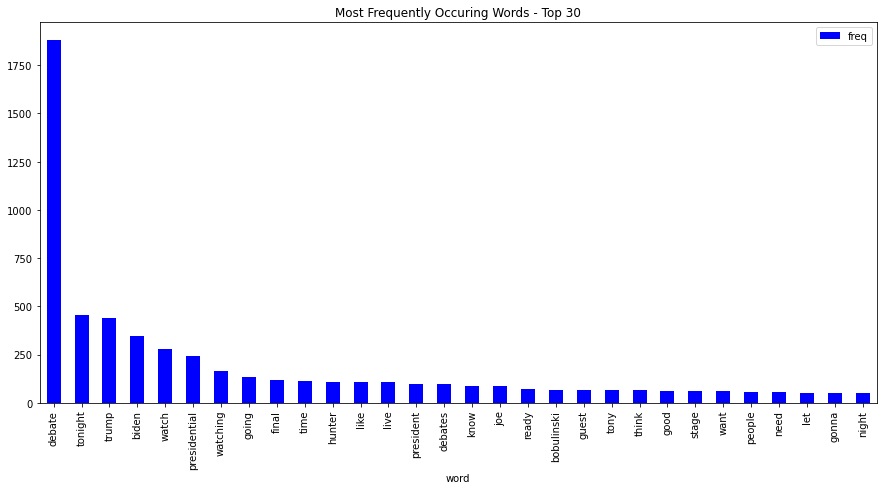

In [14]:
cv = CountVectorizer(stop_words = 'english')
words = cv.fit_transform(tokens_cl)

sum_words = words.sum(axis=0)

words_freq = [(word, sum_words[0, i]) for word, i in cv.vocabulary_.items()]
words_freq = sorted(words_freq, key = lambda x: x[1], reverse = True)

frequency = pd.DataFrame(words_freq, columns=['word', 'freq'])

frequency.head(30).plot(x='word', y='freq', kind='bar', figsize=(15, 7), color = 'blue')
plt.title("Most Frequently Occuring Words - Top 30")

Text(0.5, 1.0, 'WordCloud - Comments for Debate1')

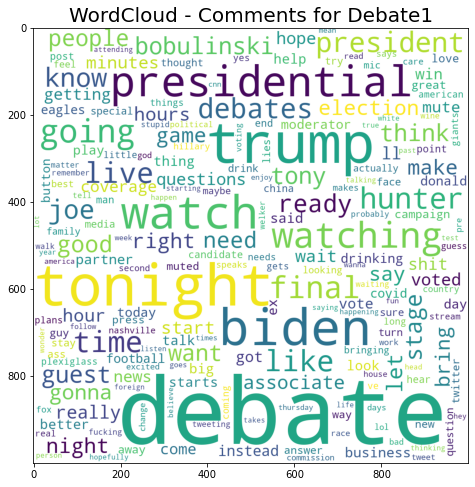

In [15]:
from wordcloud import WordCloud
wordcloud = WordCloud(background_color = 'white', width = 1000, height = 1000).generate_from_frequencies(dict(words_freq))

plt.figure(figsize=(10,8))
plt.imshow(wordcloud)
plt.title("WordCloud - Comments for Debate1", fontsize = 20)

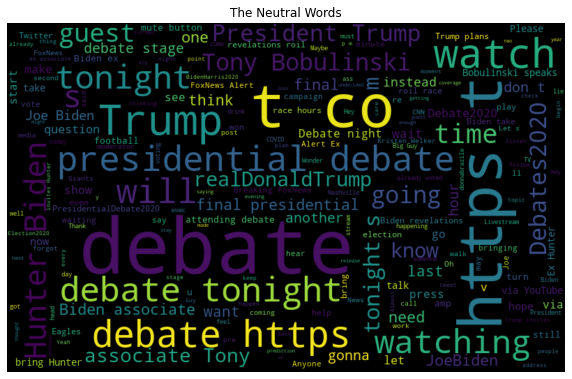

In [16]:
normal_words =' '.join([ content for content in df['content'][df['sentiment'] == 'Neutral']])

wordcloud = WordCloud(width=800, height=500, random_state = 0, max_font_size = 110).generate(normal_words)
plt.figure(figsize=(10, 7))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis('off')
plt.title('The Neutral Words')
plt.show()

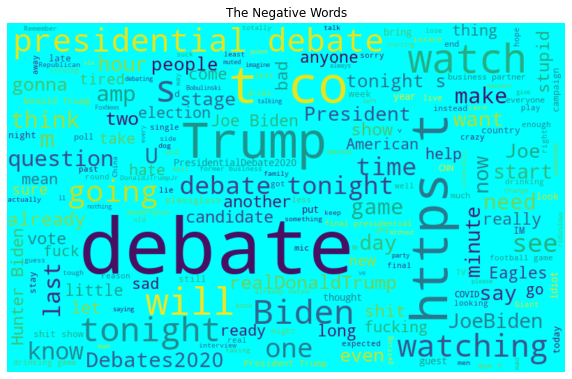

In [17]:
negative_words =' '.join([ content for content in df['content'][df['sentiment'] == 'Negative']])

wordcloud = WordCloud(background_color = 'cyan', width=800, height=500, random_state = 0, max_font_size = 110).generate(negative_words)
plt.figure(figsize=(10, 7))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis('off')
plt.title('The Negative Words')
plt.show()

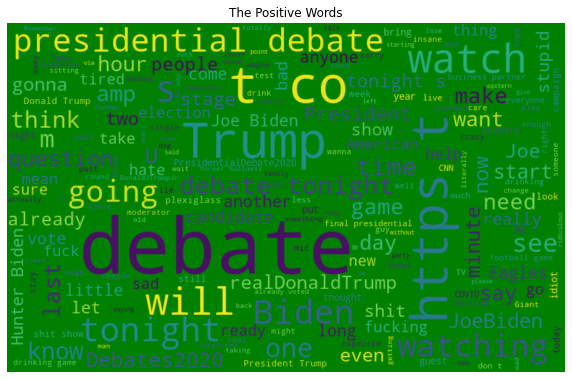

In [18]:
positive_words =' '.join([ content for content in df['content'][df['sentiment'] == 'Positive']])

wordcloud = WordCloud(background_color = 'green', width=800, height=500, random_state = 0, max_font_size = 110).generate(negative_words)
plt.figure(figsize=(10, 7))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis('off')
plt.title('The Positive Words')
plt.show()

In [19]:
df.drop(['user_country','source','date'],axis=1,inplace=True)
df

,content,sentiment
0,I’m watching the debate tonight not to learn a...,Neutral
1,@RyanSticky Wish for proper debate. Then provi...,Positive
2,@GOP @realDonaldTrump It's all hands on deck -...,Neutral
3,@fdlreporter And the debate committee cancels ...,Negative
4,If you’re not joining us on @4DeepMedia DISCOR...,Positive
...,...,...
1995,@RyanAFournier It should be fine. The host wil...,Positive
1996,@NBCNews I am new to Twitter Will there be l...,Positive
1997,@YahooFinance @SibileTV Clearly the Biden camp...,Positive
1998,@lori_stella75 Are you getting ready for the ...,Positive


In [20]:
from nltk.tokenize import WordPunctTokenizer
tok = WordPunctTokenizer()

In [21]:
pat1 = r'@[A-Za-z0-9]+'
pat2 = r'https?://[A-Za-z0-9./]+'
combined_pat = r'|'.join((pat1, pat2))

def tweet_cleaner(text):
    soup = BeautifulSoup(text, 'lxml')
    souped = soup.get_text()
    stripped = re.sub(combined_pat, '', souped)
    try:
        clean = stripped.decode("utf-8-sig").replace(u"\ufffd", "?")
    except:
        clean = stripped
    letters_only = re.sub("[^a-zA-Z]", " ", clean)
    lower_case = letters_only.lower()
    # During the letters_only process two lines above, it has created unnecessay white spaces,
    # I will tokenize and join together to remove unneccessary white spaces
    words = tok.tokenize(lower_case)
    return (" ".join(words)).strip()

In [22]:
testing = df.content[:2000]

In [23]:
from bs4 import BeautifulSoup

In [24]:

test_result = []
for t in testing:
    test_result.append(tweet_cleaner(t))

In [25]:
Cleaned_data= {'sentiment':df['sentiment'], 
        'content':test_result} 

In [26]:
data=pd.DataFrame(Cleaned_data)
data

,sentiment,content
0,Neutral,i m watching the debate tonight not to learn a...
1,Positive,wish for proper debate then provide a conclusi...
2,Neutral,it s all hands on deck even rudy s as donald t...
3,Negative,and the debate committee cancels foreign polic...
4,Positive,if you re not joining us on discord for live d...
...,...,...
1995,Positive,it should be fine the host will mute everybody...
1996,Positive,i am new to twitter will there be live comment...
1997,Positive,clearly the biden campaign missed the vp debates
1998,Positive,stella are you getting ready for the debate i ...


In [27]:
df1=data[data.sentiment == 'Positive']

In [28]:
df2=data[data.sentiment == 'Negative']

In [29]:
df3=df1.append(df2) 
df3

,sentiment,content
1,Positive,wish for proper debate then provide a conclusi...
4,Positive,if you re not joining us on discord for live d...
7,Positive,watching e bruce reminds me of someone his voi...
8,Positive,if you missed the last one make sure you tune ...
9,Positive,true the internet will always find something t...
...,...,...
1963,Negative,forget this boring debate join the obama stans...
1976,Negative,i already voted for biden i m not watching the...
1977,Negative,going to watch the debate tonight like a sick ...
1982,Negative,not watching either the debate or the football...


In [30]:
df3=df3.replace('Positive',1).replace('Negative',0)

In [31]:
df3

,sentiment,content
1,1,wish for proper debate then provide a conclusi...
4,1,if you re not joining us on discord for live d...
7,1,watching e bruce reminds me of someone his voi...
8,1,if you missed the last one make sure you tune ...
9,1,true the internet will always find something t...
...,...,...
1963,0,forget this boring debate join the obama stans...
1976,0,i already voted for biden i m not watching the...
1977,0,going to watch the debate tonight like a sick ...
1982,0,not watching either the debate or the football...


In [32]:
from sklearn.model_selection import train_test_split
from nltk.stem.porter import PorterStemmer

In [33]:
train, test = train_test_split(df3, test_size=0.25, random_state=42)
print(train.shape)
print(test.shape)

(912, 2)
(305, 2)


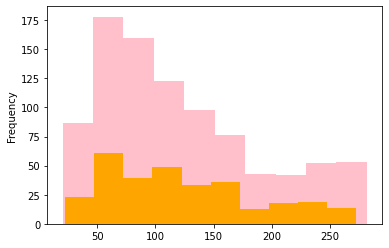

In [34]:
length_train = train['content'].str.len().plot.hist(color = 'pink', figsize = (6, 4))
length_test = test['content'].str.len().plot.hist(color = 'orange', figsize = (6, 4))

In [35]:
tokenized_tweet = train['content'].apply(lambda x: x.split()) 

# importing gensim
import gensim

# creating a word to vector model
model_w2v = gensim.models.Word2Vec(
            tokenized_tweet,
            size=200, # desired no. of features/independent variables 
            window=5, # context window size
            min_count=2,
            sg = 1, # 1 for skip-gram model
            hs = 0,
            negative = 10, # for negative sampling
            workers= 2, # no.of cores
            seed = 34)

model_w2v.train(tokenized_tweet, total_examples= len(train['content']), epochs=20)

(253827, 416960)

In [36]:
model_w2v.wv.most_similar(positive = "trump")

[('broadcast', 0.7933705449104309),
 ('donald', 0.7873551249504089),
 ('tonights', 0.7806695699691772),
 ('tonite', 0.7799303531646729),
 ('break', 0.7731376886367798),
 ('running', 0.7723881602287292),
 ('rival', 0.7719428539276123),
 ('ahead', 0.769457995891571),
 ('j', 0.7684842944145203),
 ('everybody', 0.7680851221084595)]

In [37]:
model_w2v.wv.most_similar(negative = "trum")

[('bring', -0.35567665100097656),
 ('president', -0.37718021869659424),
 ('business', -0.3989233076572418),
 ('expected', -0.40478643774986267),
 ('hunter', -0.42012330889701843),
 ('via', -0.4261232018470764),
 ('partner', -0.4279046952724457),
 ('his', -0.43802982568740845),
 ('former', -0.4382709264755249),
 ('associate', -0.4429228901863098)]

In [38]:
from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer
import tensorflow.keras as keras


In [39]:
from tensorflow.keras.preprocessing import sequence
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Embedding, GlobalMaxPooling1D, Flatten, Conv1D, Dropout, Activation
from tensorflow.keras.preprocessing.text import Tokenizer

In [40]:
import nltk
nltk.download('punkt')

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\anshi\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [41]:
Tr=train["content"].values.tolist()
Te=test["content"].values.tolist()
from sklearn.feature_extraction.text import CountVectorizer

cv = CountVectorizer(max_features = 500)
x_train = cv.fit_transform(Tr).toarray()
y_train = train.iloc[:, 0]
y_test=test.iloc[:,0]
print(x_train.shape)
print(y_train.shape)

cv = CountVectorizer(max_features = 500)
x_test = cv.fit_transform(Te).toarray()

print(x_test.shape)

(912, 500)
(912,)
(305, 500)


In [42]:
from sklearn.preprocessing import StandardScaler

sc = StandardScaler()

x_train = sc.fit_transform(x_train)

x_test = sc.transform(x_test)

In [43]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix
from sklearn.metrics import f1_score

model = RandomForestClassifier()
model.fit(x_train, y_train)

y_pred = model.predict(x_test)

print("Training Accuracy :", model.score(x_train, y_train))
print("Validation Accuracy :", model.score(x_test, y_test))

# calculating the f1 score for the validation set
print("F1 score :", f1_score(y_test, y_pred))

# confusion matrix
cm = confusion_matrix(y_test, y_pred)
print(cm)

Training Accuracy : 1.0
Validation Accuracy : 0.521311475409836
F1 score : 0.5898876404494382
[[ 54  42]
 [104 105]]


In [44]:
from sklearn.linear_model import LogisticRegression

model = LogisticRegression()
model.fit(x_train, y_train)

y_pred = model.predict(x_test)

print("Training Accuracy :", model.score(x_train, y_train))
print("Validation Accuracy :", model.score(x_test, y_test))

# calculating the f1 score for the validation set
print("f1 score :", f1_score(y_test, y_pred))

# confusion matrix
cm = confusion_matrix(y_test, y_pred)
print(cm)

Training Accuracy : 0.9989035087719298
Validation Accuracy : 0.5672131147540984
f1 score : 0.6901408450704225
[[ 26  70]
 [ 62 147]]


In [45]:
from sklearn.tree import DecisionTreeClassifier

model = DecisionTreeClassifier()
model.fit(x_train, y_train)

y_pred = model.predict(x_test)

print("Training Accuracy :", model.score(x_train, y_train))
print("Validation Accuracy :", model.score(x_test, y_test))

# calculating the f1 score for the validation set
print("f1 score :", f1_score(y_test, y_pred))

# confusion matrix
cm = confusion_matrix(y_test, y_pred)
print(cm)

Training Accuracy : 1.0
Validation Accuracy : 0.5278688524590164
f1 score : 0.5885714285714286
[[ 58  38]
 [106 103]]


In [46]:
from sklearn.svm import SVC

model = SVC()
model.fit(x_train, y_train)

y_pred = model.predict(x_test)

print("Training Accuracy :", model.score(x_train, y_train))
print("Validation Accuracy :", model.score(x_test, y_test))

# calculating the f1 score for the validation set
print("f1 score :", f1_score(y_test, y_pred))

# confusion matrix
cm = confusion_matrix(y_test, y_pred)
print(cm)

Training Accuracy : 0.9550438596491229
Validation Accuracy : 0.6721311475409836
f1 score : 0.8
[[  5  91]
 [  9 200]]


In [47]:
imdb_tokenizer = Tokenizer(num_words=500)
imdb_tokenizer.fit_on_texts(train['content'].values)
MAX_LEN=500

x_train_seq = imdb_tokenizer.texts_to_sequences(train['content'].values)
x_val_seq = imdb_tokenizer.texts_to_sequences(test['content'].values)

x_train = sequence.pad_sequences(x_train_seq, maxlen=MAX_LEN, padding="post", value=0)
x_val = sequence.pad_sequences(x_val_seq, maxlen=MAX_LEN, padding="post", value=0)

y_train, y_val = train['sentiment'].values, test['sentiment'].values

print('First sample before preprocessing: \n', train['content'].values[0], '\n')
print('First sample after preprocessing: \n', x_train[0])

First sample before preprocessing: 
 no stream tonight going to write some code and watch the debate have a great evening everyone see you this weekend 

First sample after preprocessing: 
 [ 71 404  13  42   3  99   6  24   1   2  31   5 127 165  53  17  15   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   

In [48]:
NUM_FILTERS = 250
KERNEL_SIZE = 5
HIDDEN_DIMS = 250

BATCH_SIZE = 128 # Number of examples used in each iteration
EPOCHS = 20 # Number of passes through entire dataset
VOCAB_SIZE = 30000 # Size of vocabulary dictionary
MAX_LEN = 500 # Max length of review (in words)
EMBEDDING_DIM = 40 # Dimension of word embedding vector

In [49]:
print('Build model...')
model = Sequential()

# we start off with an efficient embedding layer which maps
# our vocab indices into EMBEDDING_DIM dimensions
model.add(Embedding(VOCAB_SIZE, EMBEDDING_DIM, input_length=MAX_LEN))
model.add(Dropout(0.2))

# we add a Convolution1D, which will learn NUM_FILTERS filters
model.add(Conv1D(NUM_FILTERS,
                 KERNEL_SIZE,
                 padding='valid',
                 activation='relu',
                 strides=1))

# we use max pooling:
model.add(GlobalMaxPooling1D())

# We add a vanilla hidden layer:
model.add(Dense(HIDDEN_DIMS))
model.add(Dropout(0.2))
model.add(Activation('relu'))

# We project onto a single unit output layer, and squash it with a sigmoid:
model.add(Dense(1))
model.add(Activation('sigmoid'))
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
model.summary()

Build model...
Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding (Embedding)        (None, 500, 40)           1200000   
_________________________________________________________________
dropout (Dropout)            (None, 500, 40)           0         
_________________________________________________________________
conv1d (Conv1D)              (None, 496, 250)          50250     
_________________________________________________________________
global_max_pooling1d (Global (None, 250)               0         
_________________________________________________________________
dense (Dense)                (None, 250)               62750     
_________________________________________________________________
dropout_1 (Dropout)          (None, 250)               0         
_________________________________________________________________
activation (Activation)      (None, 250) 

In [50]:
model.fit(x_train, y_train,
          batch_size=BATCH_SIZE,
          epochs=EPOCHS,
          validation_split=0.1,
          verbose=2)

# Evaluate the model
score, acc = model.evaluate(x_val, y_val, batch_size=BATCH_SIZE)
print('\nAccuracy: ', acc*100)

pred = model.predict_classes(x_val)

Epoch 1/20
7/7 - 1s - loss: 0.6662 - accuracy: 0.6268 - val_loss: 0.6456 - val_accuracy: 0.6522
Epoch 2/20
7/7 - 1s - loss: 0.6628 - accuracy: 0.6317 - val_loss: 0.6435 - val_accuracy: 0.6522
Epoch 3/20
7/7 - 1s - loss: 0.6531 - accuracy: 0.6317 - val_loss: 0.6503 - val_accuracy: 0.6522
Epoch 4/20
7/7 - 1s - loss: 0.6510 - accuracy: 0.6317 - val_loss: 0.6480 - val_accuracy: 0.6522
Epoch 5/20
7/7 - 1s - loss: 0.6386 - accuracy: 0.6317 - val_loss: 0.6327 - val_accuracy: 0.6522
Epoch 6/20
7/7 - 1s - loss: 0.6204 - accuracy: 0.6317 - val_loss: 0.6178 - val_accuracy: 0.6522
Epoch 7/20
7/7 - 1s - loss: 0.5869 - accuracy: 0.6317 - val_loss: 0.5995 - val_accuracy: 0.6522
Epoch 8/20
7/7 - 1s - loss: 0.5346 - accuracy: 0.6902 - val_loss: 0.5683 - val_accuracy: 0.7174
Epoch 9/20
7/7 - 1s - loss: 0.4698 - accuracy: 0.7890 - val_loss: 0.5387 - val_accuracy: 0.7609
Epoch 10/20
7/7 - 1s - loss: 0.4059 - accuracy: 0.8500 - val_loss: 0.5280 - val_accuracy: 0.7500
Epoch 11/20
7/7 - 1s - loss: 0.3364 - a

In [51]:
df4=data.replace('Positive',1).replace('Negative',0).replace('Neutral',-1)
df4

,sentiment,content
0,-1,i m watching the debate tonight not to learn a...
1,1,wish for proper debate then provide a conclusi...
2,-1,it s all hands on deck even rudy s as donald t...
3,0,and the debate committee cancels foreign polic...
4,1,if you re not joining us on discord for live d...
...,...,...
1995,1,it should be fine the host will mute everybody...
1996,1,i am new to twitter will there be live comment...
1997,1,clearly the biden campaign missed the vp debates
1998,1,stella are you getting ready for the debate i ...


In [52]:
X=df4['content']
Y=df4['sentiment']
X_train, X_valid, Y_train, Y_valid = train_test_split(X, Y, test_size = 0.25, random_state = 42)


In [53]:
TR=X_train.tolist()
TE=X_valid.tolist()
from sklearn.feature_extraction.text import CountVectorizer

cv = CountVectorizer(max_features = 500)
X_Train = cv.fit_transform(TR).toarray()
Y1 = Y_train
Y_test=Y_valid
print(X_Train.shape)
print(Y1.shape)

cv = CountVectorizer(max_features = 500)
X_test = cv.fit_transform(TE).toarray()

print(X_test.shape)

(1500, 500)
(1500,)
(500, 500)


In [54]:
print(X_Train.shape)
print(X_test.shape)
print(Y_train.shape)
print(Y_valid.shape)

(1500, 500)
(500, 500)
(1500,)
(500,)


In [55]:
model = RandomForestClassifier()
model.fit(X_Train, Y_train)

Y_pred = model.predict(X_test)

print("Training Accuracy :", model.score(X_Train, Y_train))
print("Validation Accuracy :", model.score(X_test, Y_valid))

# calculating the f1 score for the validation set
print("F1 score :", f1_score(Y_valid, Y_pred,average=None))

# confusion matrix
cm = confusion_matrix(Y_valid, Y_pred)
print(cm)

Training Accuracy : 0.998
Validation Accuracy : 0.41
F1 score : [0.47671233 0.20853081 0.45283019]
[[87 37 76]
 [26 22 50]
 [52 54 96]]


In [56]:
from sklearn.linear_model import LogisticRegression

model = LogisticRegression()
model.fit(X_Train, Y_train)

y_pred = model.predict(X_test)

print("Training Accuracy :", model.score(X_Train, Y_train))
print("Validation Accuracy :", model.score(X_test, Y_test))

# calculating the f1 score for the validation set
print("f1 score :", f1_score(Y_test, y_pred,average=None))

# confusion matrix
cm = confusion_matrix(Y_test, y_pred)
print(cm)

Training Accuracy : 0.9146666666666666
Validation Accuracy : 0.368
f1 score : [0.44827586 0.27424749 0.36827195]
[[78 71 51]
 [22 41 35]
 [48 89 65]]


C:\Users\anshi\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [57]:
from sklearn.tree import DecisionTreeClassifier

model = DecisionTreeClassifier()
model.fit(X_Train, Y_train)

y_pred = model.predict(X_test)

print("Training Accuracy :", model.score(X_Train, Y_train))
print("Validation Accuracy :", model.score(X_test, Y_test))

# calculating the f1 score for the validation set
print("f1 score :", f1_score(Y_test, y_pred,average=None))

# confusion matrix
cm = confusion_matrix(Y_test, y_pred)
print(cm)

Training Accuracy : 0.998
Validation Accuracy : 0.406
f1 score : [0.49056604 0.22857143 0.39401496]
[[104  19  77]
 [ 35  20  43]
 [ 85  38  79]]


In [58]:
from sklearn.svm import SVC

model = SVC()
model.fit(X_Train, Y_train)

y_pred = model.predict(X_test)

print("Training Accuracy :", model.score(X_Train, Y_train))
print("Validation Accuracy :", model.score(X_test, Y_test))

# calculating the f1 score for the validation set
print("f1 score :", f1_score(Y_test, y_pred,average=None))

# confusion matrix
cm = confusion_matrix(Y_test, y_pred)
print(cm)

Training Accuracy : 0.8766666666666667
Validation Accuracy : 0.478
f1 score : [0.60740741 0.15116279 0.48699764]
[[123  19  58]
 [ 25  13  60]
 [ 57  42 103]]


In [59]:
X_Train

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 5, 0, 0]], dtype=int64)

In [60]:
imdb_tokenizer = Tokenizer(num_words=500)
TRain=pd.DataFrame(X_Train)
TEst=pd.DataFrame(X_test)
YTrain=pd.DataFrame(Y_train)
YTest=pd.DataFrame(Y_test)
imdb_tokenizer.fit_on_texts(TR)
MAX_LEN=500

x_train_seq = imdb_tokenizer.texts_to_sequences(TR)
x_val_seq = imdb_tokenizer.texts_to_sequences(TE)

x_train = sequence.pad_sequences(x_train_seq, maxlen=MAX_LEN, padding="post", value=0)
x_val = sequence.pad_sequences(x_val_seq, maxlen=MAX_LEN, padding="post", value=0)

y_train, y_val = YTrain['sentiment'].values, YTest['sentiment'].values

print('First sample before preprocessing: \n', TR, '\n')
print('First sample after preprocessing: \n', X_Train[0])

First sample before preprocessing: 
 ['i m filling out my absentee ballot during the debates basically president trump would have to murder joe biden on stage tonight for me to consider not re electing him and even then i d have to investigate', 'i plan on praying throughout the entire debate', 'markets gonna move on this debate or not what d we get last time spike higher right might dabble in some mes here', 'im so nervous for this debate', 'all around the country last minute debate preparation is underway via handelsman texas', 'oh fuck the debate is tonight', 'more hunter biden texts and emails emerge hours before debate', 'i swear to god it s like you knew i needed this movie more than the debate luv u', 'must ask lazy at debate if he has regrets voting for iraqwar which was an act of sheer terror mass murder he should also be asked you say americans should have the same health care as your family then why do you oppose singlepayer medicare for all', 'during one of the debates agai

In [61]:
NUM_FILTERS = 250
KERNEL_SIZE = 5
HIDDEN_DIMS = 250

BATCH_SIZE = 128 # Number of examples used in each iteration
EPOCHS = 20 # Number of passes through entire dataset
VOCAB_SIZE = 30000 # Size of vocabulary dictionary
MAX_LEN = 500 # Max length of review (in words)
EMBEDDING_DIM = 40 # Dimension of word embedding vector

In [62]:
print('Build model...')
model = Sequential()

# we start off with an efficient embedding layer which maps
# our vocab indices into EMBEDDING_DIM dimensions
model.add(Embedding(VOCAB_SIZE, EMBEDDING_DIM, input_length=MAX_LEN))
model.add(Dropout(0.2))

# we add a Convolution1D, which will learn NUM_FILTERS filters
model.add(Conv1D(NUM_FILTERS,
                 KERNEL_SIZE,
                 padding='valid',
                 activation='relu',
                 strides=1))

# we use max pooling:
model.add(GlobalMaxPooling1D())

# We add a vanilla hidden layer:
model.add(Dense(HIDDEN_DIMS))
model.add(Dropout(0.2))
model.add(Activation('relu'))

# We project onto a single unit output layer, and squash it with a sigmoid:
model.add(Dense(1))
model.add(Activation('sigmoid'))
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
model.summary()

Build model...
Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_1 (Embedding)      (None, 500, 40)           1200000   
_________________________________________________________________
dropout_2 (Dropout)          (None, 500, 40)           0         
_________________________________________________________________
conv1d_1 (Conv1D)            (None, 496, 250)          50250     
_________________________________________________________________
global_max_pooling1d_1 (Glob (None, 250)               0         
_________________________________________________________________
dense_2 (Dense)              (None, 250)               62750     
_________________________________________________________________
dropout_3 (Dropout)          (None, 250)               0         
_________________________________________________________________
activation_2 (Activation)    (None, 250

In [63]:
model.fit(x_train, y_train,
          batch_size=BATCH_SIZE,
          epochs=EPOCHS,
          validation_split=0.1,
          verbose=2)

# Evaluate the model
score, acc = model.evaluate(x_val, y_val, batch_size=BATCH_SIZE)
print('\nAccuracy: ', acc*100)

pred = model.predict_classes(x_val)

Epoch 1/20
11/11 - 2s - loss: 0.4271 - accuracy: 0.2378 - val_loss: 0.0414 - val_accuracy: 0.2200
Epoch 2/20
11/11 - 2s - loss: 0.0434 - accuracy: 0.2215 - val_loss: -3.7432e-01 - val_accuracy: 0.2200
Epoch 3/20
11/11 - 2s - loss: 0.0818 - accuracy: 0.2215 - val_loss: -5.3216e-01 - val_accuracy: 0.2200
Epoch 4/20
11/11 - 2s - loss: 0.0762 - accuracy: 0.2215 - val_loss: -5.7231e-01 - val_accuracy: 0.2200
Epoch 5/20
11/11 - 2s - loss: 0.0359 - accuracy: 0.2215 - val_loss: -5.2164e-01 - val_accuracy: 0.2200
Epoch 6/20
11/11 - 2s - loss: 0.0517 - accuracy: 0.2215 - val_loss: -6.1700e-01 - val_accuracy: 0.2200
Epoch 7/20
11/11 - 2s - loss: -5.1375e-02 - accuracy: 0.2215 - val_loss: -5.7808e-01 - val_accuracy: 0.2200
Epoch 8/20
11/11 - 2s - loss: -2.9274e-01 - accuracy: 0.2215 - val_loss: -9.3447e-01 - val_accuracy: 0.2200
Epoch 9/20
11/11 - 2s - loss: -8.6187e-01 - accuracy: 0.2215 - val_loss: -1.8289e+00 - val_accuracy: 0.2267
Epoch 10/20
11/11 - 2s - loss: -2.3536e+00 - accuracy: 0.2296 -